# Analysis of Metrics at 1 Million Games

This notebook seeks to provide some analysis on the progress of the DQN learning agent on a 4 x 4 cell Dots and Boxes grid (or 5 dots x 5 dots)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### Load Logs into Dataframe

In [2]:
log = '../models/size4/logs.txt'
log_df = pd.read_csv(log)

In [3]:
agent_groups = log_df.groupby('Test Agent')
random_progress = agent_groups.get_group('random_player')
moderate_progress = agent_groups.get_group('moderate_player')
advanced_progress = agent_groups.get_group('advanced_player')

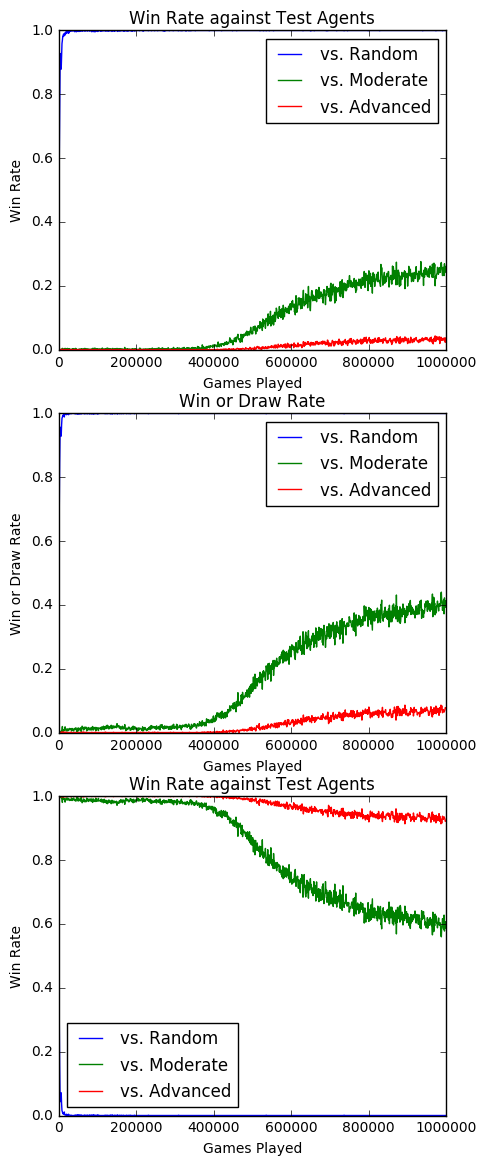

In [32]:
fig = plt.figure(figsize=(5,14))

#Win Rate
ax1 = plt.subplot(311)
ax1.plot(random_progress['Game Number'],random_progress['Win Percentage'])
ax1.plot(moderate_progress['Game Number'], moderate_progress['Win Percentage'])
ax1.plot(advanced_progress['Game Number'], advanced_progress['Win Percentage'])
ax1.legend(['vs. Random','vs. Moderate','vs. Advanced'],loc='upper right')
ax1.set_title('Win Rate against Test Agents')
ax1.set_xlabel('Games Played')
ax1.set_ylabel('Win Rate')

#Win Rate + Draw Rate
ax2 = plt.subplot(312)
ax2.plot(random_progress['Game Number'],random_progress['Win Percentage'] + random_progress['Draw Percentage'])
ax2.plot(moderate_progress['Game Number'], moderate_progress['Win Percentage'] + moderate_progress['Draw Percentage'])
ax2.plot(advanced_progress['Game Number'], advanced_progress['Win Percentage'] + advanced_progress['Draw Percentage'])
ax2.legend(['vs. Random','vs. Moderate','vs. Advanced'],loc='upper right')
ax2.set_title('Win or Draw Rate')
ax2.set_xlabel('Games Played')
ax2.set_ylabel('Win or Draw Rate')

#Loss Rate
ax3 = plt.subplot(313)
ax3.plot(random_progress['Game Number'],random_progress['Loss Percentage'])
ax3.plot(moderate_progress['Game Number'], moderate_progress['Loss Percentage'])
ax3.plot(advanced_progress['Game Number'], advanced_progress['Loss Percentage'])
ax3.legend(['vs. Random','vs. Moderate','vs. Advanced'],loc='lower left')
ax3.set_title('Win Rate against Test Agents')
ax3.set_xlabel('Games Played')
ax3.set_ylabel('Win Rate')




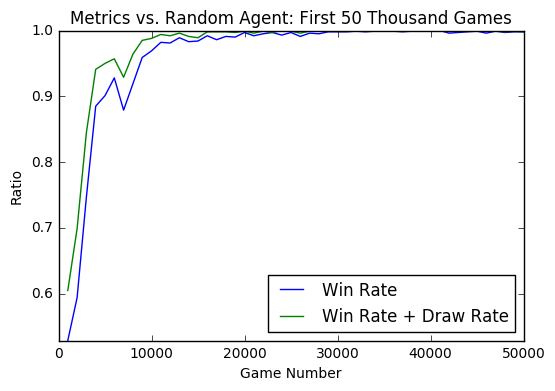

In [45]:
# Plot just vs random for the first 50 thousand
plt.plot(random_progress['Game Number'].iloc[:50], random_progress['Win Percentage'].iloc[:50])
plt.plot(random_progress['Game Number'].iloc[:50], random_progress['Win Percentage'].iloc[:50] + 
         random_progress['Draw Percentage'].iloc[:50])
plt.ylim(random_progress['Win Percentage'].iloc[:50].min(),random_progress['Win Percentage'].iloc[:50].max())
plt.xlabel('Game Number')
plt.ylabel('Ratio')
plt.legend(['Win Rate','Win Rate + Draw Rate'],loc='lower right')
plt.title('Metrics vs. Random Agent: First 50 Thousand Games')


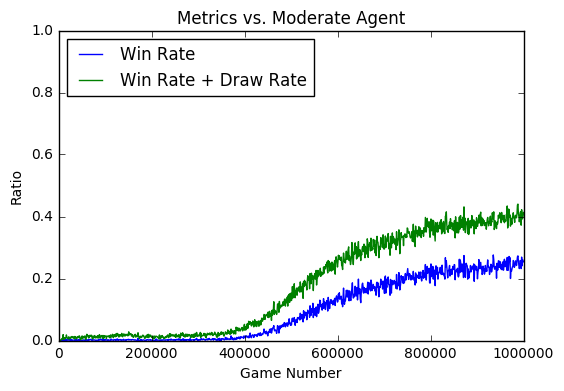

In [49]:
plt.plot(moderate_progress['Game Number'], moderate_progress['Win Percentage'])
plt.plot(moderate_progress['Game Number'], moderate_progress['Win Percentage'] + 
         moderate_progress['Draw Percentage'])
plt.ylim(0, 1)
plt.xlabel('Game Number')
plt.ylabel('Ratio')
plt.legend(['Win Rate','Win Rate + Draw Rate'],loc='upper left')
plt.title('Metrics vs. Moderate Agent')

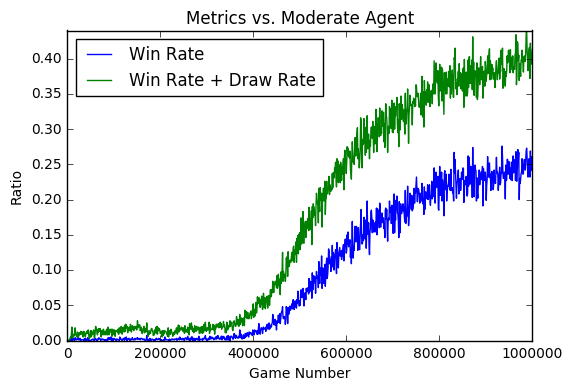

In [50]:
plt.plot(moderate_progress['Game Number'], moderate_progress['Win Percentage'])
plt.plot(moderate_progress['Game Number'], moderate_progress['Win Percentage'] + 
         moderate_progress['Draw Percentage'])
plt.ylim(0, (moderate_progress['Win Percentage'] + 
         moderate_progress['Draw Percentage']).max())
plt.xlabel('Game Number')
plt.ylabel('Ratio')
plt.legend(['Win Rate','Win Rate + Draw Rate'],loc='upper left')
plt.title('Metrics vs. Moderate Agent')

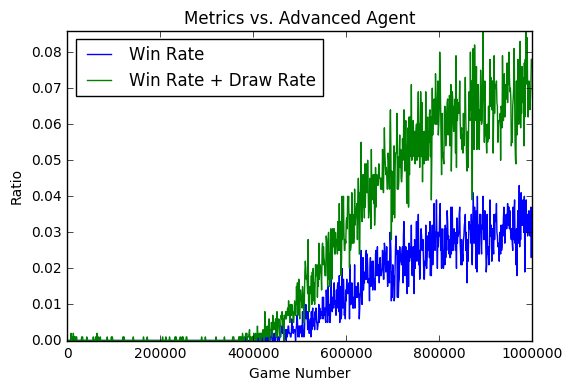

In [53]:
plt.plot(advanced_progress['Game Number'], advanced_progress['Win Percentage'])
plt.plot(advanced_progress['Game Number'], advanced_progress['Win Percentage'] + 
         advanced_progress['Draw Percentage'])
plt.ylim(0, (advanced_progress['Win Percentage'] + 
         advanced_progress['Draw Percentage']).max())
plt.xlabel('Game Number')
plt.ylabel('Ratio')
plt.legend(['Win Rate','Win Rate + Draw Rate'],loc='upper left')
plt.title('Metrics vs. Advanced Agent')

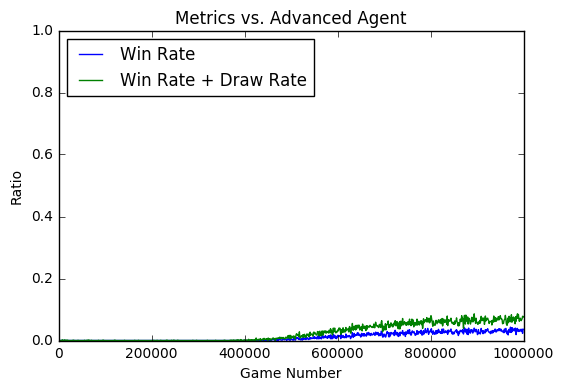

In [55]:
plt.plot(advanced_progress['Game Number'], advanced_progress['Win Percentage'])
plt.plot(advanced_progress['Game Number'], advanced_progress['Win Percentage'] + 
         advanced_progress['Draw Percentage'])
plt.ylim(0, 1)
plt.xlabel('Game Number')
plt.ylabel('Ratio')
plt.legend(['Win Rate','Win Rate + Draw Rate'],loc='upper left')
plt.title('Metrics vs. Advanced Agent')

In [80]:
def moving_average(a, n=20) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [87]:
ma_dataframe_wins = pd.DataFrame()

In [88]:
ma_dataframe_wins['Random Win'] = moving_average(random_progress['Win Percentage'].as_matrix())
ma_dataframe_wins['Moderate Win'] = moving_average(moderate_progress['Win Percentage'].as_matrix())
ma_dataframe_wins['Advanced Win'] = moving_average(advanced_progress['Win Percentage'].as_matrix())


In [89]:
ma_dataframe_wins

Random Win  Moderate Win  Advanced Win
0       0.90925       0.00110       0.00010
1       0.93240       0.00115       0.00010
2       0.95245       0.00125       0.00010
3       0.96495       0.00145       0.00010
4       0.97035       0.00150       0.00010
5       0.97515       0.00155       0.00010
6       0.97830       0.00165       0.00010
7       0.98415       0.00170       0.00010
8       0.98795       0.00185       0.00005
9       0.98990       0.00175       0.00005
10      0.99135       0.00160       0.00005
11      0.99215       0.00165       0.00005
12      0.99305       0.00165       0.00005
13      0.99350       0.00160       0.00000
14      0.99430       0.00150       0.00000
15      0.99510       0.00150       0.00000
16      0.99545       0.00160       0.00000
17      0.99605       0.00145       0.00000
18      0.99645       0.00150       0.00000
19      0.99690       0.00145       0.00000
20      0.99705       0.00135       0.00000
21      0.99745       0.00140       0.00000
22      0.99750       0.00130       0.00000
23      0.99750       0.00115       0.00000
24      0.99775       0.00130       0.00000
25      0.99785       0.00140       0.00000
26      0.99810       0.00125       0.00000
27      0.99825       0.00125       0.00000
28      0.99835       0.00110       0.00000
29      0.99835       0.00110       0.00000
..          ...           ...           ...
951     1.00000       0.24580       0.02980
952     1.00000       0.24430       0.03015
953     1.00000       0.24355       0.02990
954     0.99995       0.24330       0.03045
955     0.99995       0.24210       0.03045
956     0.99995       0.24130       0.03095
957     0.99995       0.24190       0.03120
958     0.99995       0.24210       0.03165
959     0.99995       0.24175       0.03140
960     0.99995       0.24165       0.03195
961     0.99995       0.24140       0.03210
962     0.99995       0.24185       0.03165
963     0.99995       0.24185       0.03230
964     0.99995       0.24320       0.03180
965     0.99995       0.24190       0.03220
966     0.99995       0.24335       0.03235
967     0.99995       0.24555       0.03340
968     0.99995       0.24690       0.03340
969     0.99995       0.24620       0.03335
970     0.99995       0.24560       0.03345
971     0.99990       0.24385       0.03340
972     0.99990       0.24585       0.03290
973     0.99990       0.24725       0.03340
974     0.99995       0.24880       0.03310
975     0.99995       0.24895       0.03315
976     0.99995       0.25055       0.03270
977     0.99995       0.25065       0.03295
978     0.99995       0.25080       0.03240
979     0.99995       0.25085       0.03255
980     0.99995       0.25175       0.03240

[981 rows x 3 columns]

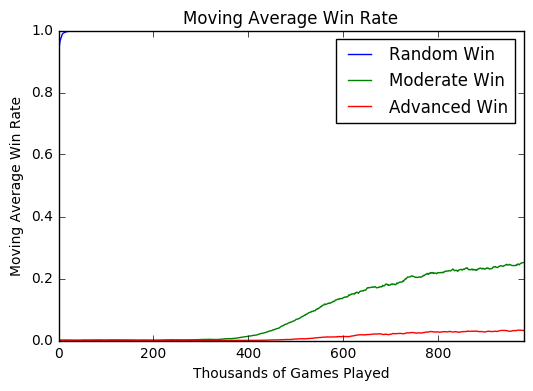

In [93]:
ma_dataframe.plot()
plt.title('Moving Average Win Rate')
plt.xlabel('Thousands of Games Played')
plt.ylabel('Moving Average Win Rate')